<Axes: xlabel='Clasificacion'>

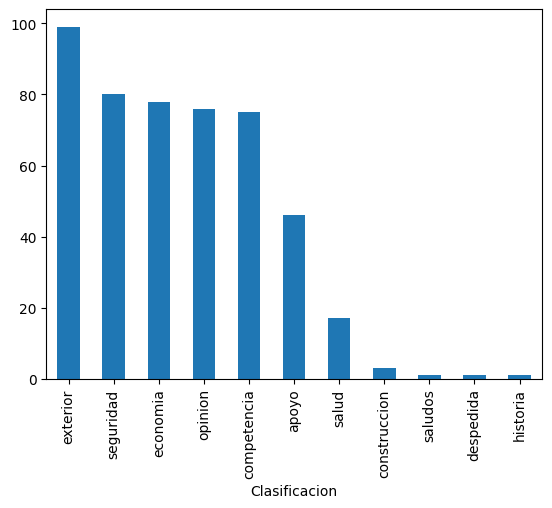

In [14]:
# file to experiment
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
import spacy
from nltk.corpus import stopwords
from spacy.lang.es.examples import sentences

nlp = spacy.load("es_core_news_sm")
df = pd.read_csv("amlo.csv")
spanish_stopwords = stopwords.words("spanish")
df_sin_nulos = df.dropna()
df = df_sin_nulos
# code to delete information that doesn't have enought words
# df = df[df["Texto"].str.split().str.len() >= 15 ]
# df.to_csv("amlo.csv", index=False)

# experiments
def text_processing(text):
    text = text.lower()
    text = re.sub(r"(@[A-Za-z0-9_]+)|([^0-9A-Za-zÁáÉéÍíÓóÚúÜüÑñ \t])|(\w+:\/\/\S+)", "", text)
    text = nlp(text)
    lema = []
    for token in text:
        lema.append(token.lemma_)
    text = lema
    text = ' '.join(text)
    text = nlp(text).vector
    return text
def aaa(text):
    text = text.lower()
    text = re.sub(r"(@[A-Za-z0-9_]+)|([^0-9A-Za-zÁáÉéÍíÓóÚúÜüÑñ \t])|(\w+:\/\/\S+)", "", text)
    text = nlp(text)
    lema = []
    for token in text:
        lema.append(token.lemma_)
    text = lema
    text = ' '.join(text)

    return text


df["vector"] = df["Texto"].apply(text_processing)
df["text_proc"] = df["Texto"].apply(aaa)
df['Clasificacion'].value_counts().plot(kind='bar')




In [15]:
df.head(10)

,Participante,Texto,Clasificacion,vector,text_proc
0,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Buenos días y feliz año. Deseamos que nos vay...,saludos,"[0.03663601, 0.82345146, 0.33627564, -0.817310...",buen día y feliz año desear que yo ir bien a...
2,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,También vamos a informar este primer día hábil...,apoyo,"[0.79579955, 0.4240991, 0.1972472, -0.84058714...",también ir a informar este primero día hábil d...
3,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Y ahora se va a informar porque se está optand...,apoyo,"[0.63534826, 0.49206573, 0.27349707, -0.881303...",y ahora él ir a informar porque él estar optar...
4,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,En esta etapa se combinan los bancos particula...,apoyo,"[0.35847524, 0.48979712, 0.14290066, -1.071981...",en este etapa él combinar el banco particular ...
5,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,"También Ariadna Montiel, que es la secretaria ...",apoyo,"[0.5383174, 0.4753525, 0.24838951, -0.75039953...",también ariadna montiel que ser el secretaria ...
6,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Pero tenerlas terminadas no significa tenerlas...,apoyo,"[0.33861518, 0.86035144, 0.22871481, -0.809176...",pero tenerla terminado no significar tenerlos ...
7,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,"También lo ocurrido ayer en Chihuahua, en Ciud...",seguridad,"[0.65873224, -0.074776724, 0.2705932, -0.78160...",también él ocurrido ayer en chihuahua en ciuda...
9,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,"Bueno, ahora que estuvo con nosotros el gober...",seguridad,"[0.75277233, 0.2534697, 0.42166564, -0.8897363...",bueno ahora que estar con yo el gobernador a...
10,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Y vamos a estar nosotros pendientes. Mañana va...,seguridad,"[0.1774322, 0.02906382, 0.29990152, -1.034701,...",y ir a estar yo pendiente mañana ir a informar...
11,PRESIDENTE ANDRES MANUEL LOPEZ OBRADOR,Quiero decir que tenemos muy buena relación co...,opinion,"[0.75266784, 0.2066916, 0.35135385, -0.9415236...",querer decir que tener mucho buen relación con...


In [21]:

from nltk.util import ngrams
from nltk import word_tokenize
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from PIL import Image
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
X = df['vector']




X = np.concatenate(X,axis=0	).reshape(-1,300) # la estamos reubicando porque si no no jala
model = TSNE(n_components=2, perplexity=30) # el preplexity es para que salga chido
resultado = model.fit_transform(X)
#get_ngrams(1, df[df['target_number'] == 'not-real-disaster']['clean_tweets'])new['tsne_1'] = resultado[:,0]
#new['tsne_2'] = resultado[:,1]




import plotly.express as px

fsne_result = pd.DataFrame({"tsne_1": resultado[:, 0], "tsne_2":resultado[:, 1]})
fsne_result["label"] = df["Clasificacion"]
fsne_result["text"] = df["text_proc"]
print(fsne_result.head())

fig = px.scatter(
    data_frame=fsne_result,
    x=fsne_result["tsne_1"],
    y=fsne_result["tsne_2"],
    color=fsne_result["label"],
    template="plotly_dark",
    hover_data=["text"],
)

fig.show()

0      [0.03663601, 0.82345146, 0.33627564, -0.817310...
2      [0.79579955, 0.4240991, 0.1972472, -0.84058714...
3      [0.63534826, 0.49206573, 0.27349707, -0.881303...
4      [0.35847524, 0.48979712, 0.14290066, -1.071981...
5      [0.5383174, 0.4753525, 0.24838951, -0.75039953...
                             ...                        
478    [0.08910922, 0.42923802, 0.11195216, -0.818825...
479    [0.6280938, 0.2387506, 0.13055648, -1.3982532,...
480    [0.503749, 0.47401372, 0.49750772, -0.8337089,...
481    [0.6371678, 0.54591763, 0.19836949, -0.9584493...
482    [0.71028286, 0.8576275, 0.16033316, -0.7847711...
Name: vector, Length: 477, dtype: object


KeyError: 1